In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os


In [9]:
train_dir = "C:\\Users\\siddh\\OneDrive\\Documents\\Desktop\\Devnagri dataset\\Train"
test_dir = "C:\\Users\\siddh\\OneDrive\\Documents\\Desktop\\Devnagri dataset\\Test"



In [10]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    color_mode="grayscale",
    batch_size=32,
    class_mode="sparse"
)

test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(32, 32),
    color_mode="grayscale",
    batch_size=32,
    class_mode="sparse"
)


Found 17000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


c:\Users\siddh\OneDrive\Documents\Desktop\handwritten-digit-recognition\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,146 (1.20 MB)

 Trainable params: 315,146 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    train_data,
    epochs=15,
    validation_data=test_data
)


c:\Users\siddh\OneDrive\Documents\Desktop\handwritten-digit-recognition\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
532/532 ━━━━━━━━━━━━━━━━━━━━ 251s 470ms/step - accuracy: 0.8470 - loss: 0.4645 - val_accuracy: 0.9857 - val_loss: 0.0523
Epoch 2/15
532/532 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.9461 - loss: 0.1698 - val_accuracy: 0.9920 - val_loss: 0.0307
Epoch 3/15
532/532 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9638 - loss: 0.1166 - val_accuracy: 0.9940 - val_loss: 0.0240
Epoch 4/15
532/532 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.9693 - loss: 0.0985 - val_accuracy: 0.9943 - val_loss: 0.0241
Epoch 5/15
532/532 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.9751 - loss: 0.0778 - val_accuracy: 0.9960 - val_loss: 0.0209
Epoch 6/15
532/532 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.9775 - loss: 0.0692 - val_accuracy: 0.9957 - val_loss: 0.0163
Epoch 7/15
532/532 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.9801 - loss: 0.0619 - val_accuracy: 0.9950 - val_loss: 0.0221
Epoch 8/15
532/532 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9836 - loss: 0.0564 

In [13]:
test_loss, test_acc = model.evaluate(test_data, verbose=2)
print(f"\n✅ Test accuracy: {test_acc:.3f}")


94/94 - 2s - 16ms/step - accuracy: 0.9970 - loss: 0.0167

✅ Test accuracy: 0.997


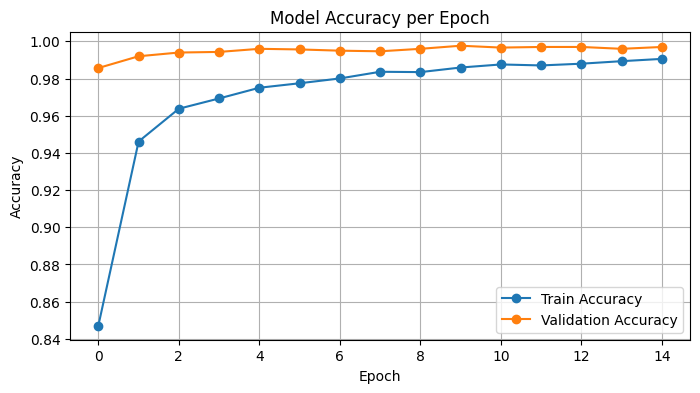

In [14]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
os.makedirs("models", exist_ok=True)
model.save("models/devanagari_digit_model.keras")
print("✅ Model saved to models/devanagari_digit_model.keras")


✅ Model saved to models/devanagari_digit_model.keras
